In [11]:
from attention_functions import (
    TRANSFORM, MODEL,
    attention_rollout, attention_flow, attention_grad_rollout,
    blank_out, input_gradients,
    create_mask, show_mask_on_image, display_output,
    get_image_list, spearman_correlation
)

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch

### Première visualisation Attention rollout

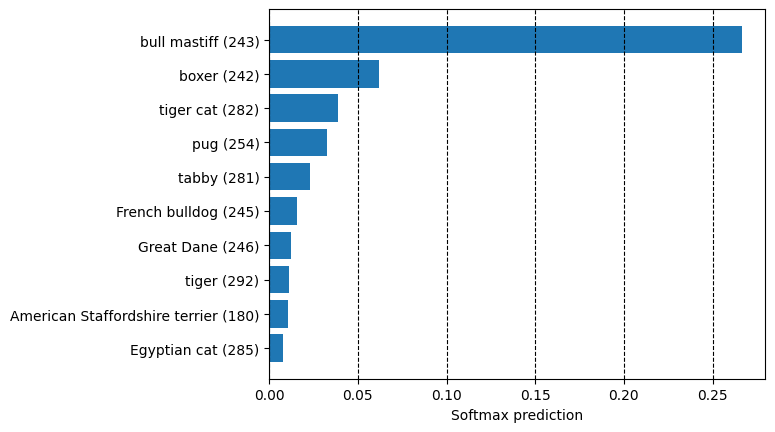

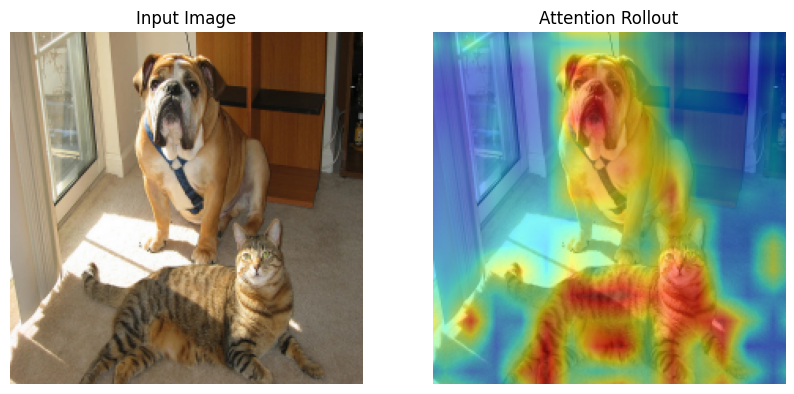

In [2]:
# Preprocessing de l'image
img_src = "./examples/both.png" ### CHOIX DE L'IMAGE
img = Image.open(img_src)
img = img.resize((224, 224))
input_tensor = TRANSFORM(img).unsqueeze(0)

# Affichage des prédictions du modèle
display_output(MODEL(input_tensor))

# Calcul de l'attention rollout
att_rollout, name = attention_rollout(input_tensor, MODEL, head_fusion="min", discard_ratio=0.4)
mask = create_mask(att_rollout)

# Affichage de l'image avec le masque
np_img = np.array(img)
masked_image = show_mask_on_image(np_img, mask)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(np_img)
ax[0].set_title("Input Image")
ax[0].axis("off")

ax[1].imshow(masked_image)
ax[1].set_title("Attention Rollout")
ax[1].axis("off")

plt.show()

### Several multi-head fusion methods

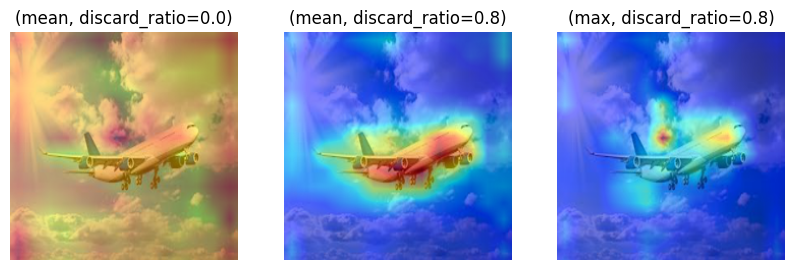

In [3]:
img_src = "./examples/plane.png" ### CHOIX DE L'IMAGE
img = Image.open(img_src)
img = img.resize((224, 224))
input_tensor = TRANSFORM(img).unsqueeze(0)
np_img = np.array(img)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

# Attention rollout
att_rollout, _ = attention_rollout(input_tensor, MODEL, head_fusion="mean", discard_ratio=0.0)
attention_rollout_mask = create_mask(att_rollout)
img_attention_rollout = show_mask_on_image(np_img, attention_rollout_mask)

ax[0].imshow(img_attention_rollout)
ax[0].set_title("(mean, discard_ratio=0.0)")
ax[0].axis("off")

att_rollout, _ = attention_rollout(input_tensor, MODEL, head_fusion="mean", discard_ratio=0.8)
attention_rollout_mask = create_mask(att_rollout)
img_attention_rollout = show_mask_on_image(np_img, attention_rollout_mask)

ax[1].imshow(img_attention_rollout)
ax[1].set_title("(mean, discard_ratio=0.8)")
ax[1].axis("off")

att_rollout, _ = attention_rollout(input_tensor, MODEL, head_fusion="max", discard_ratio=0.8)
attention_rollout_mask = create_mask(att_rollout)
img_attention_rollout = show_mask_on_image(np_img, attention_rollout_mask)

ax[2].imshow(img_attention_rollout)
ax[2].set_title("(max, discard_ratio=0.8)")
ax[2].axis("off")

plt.show()

### Comparaison attention rollout attention flow

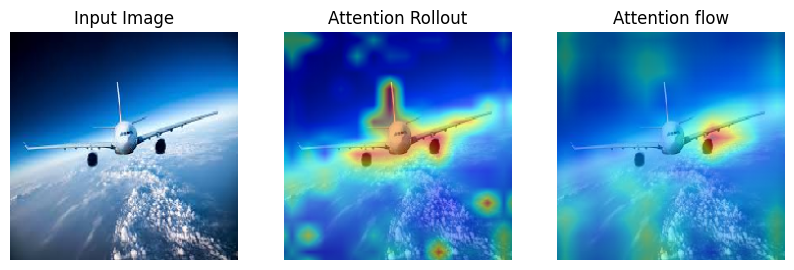

In [4]:
img_src = "./examples/plane2.png" ### CHOIX DE L'IMAGE
img = Image.open(img_src)
img = img.resize((224, 224))
input_tensor = TRANSFORM(img).unsqueeze(0)
np_img = np.array(img)

# Attention rollout
att_rollout, _ = attention_rollout(input_tensor, MODEL, head_fusion="min", discard_ratio=0.8)
attention_rollout_mask = create_mask(att_rollout)
img_attention_rollout = show_mask_on_image(np_img, attention_rollout_mask)

# Attention flow
att_flow, _ = attention_flow(input_tensor, MODEL, head_fusion="mean", discard_ratio=0.0)
att_flow_mask = create_mask(att_flow)
img_attention_flow = show_mask_on_image(np_img, att_flow_mask)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(np_img)
ax[0].set_title("Input Image")
ax[0].axis("off")

ax[1].imshow(img_attention_rollout)
ax[1].set_title("Attention Rollout")
ax[1].axis("off")

ax[2].imshow(img_attention_flow)
ax[2].set_title("Attention flow")
ax[2].axis("off")

plt.show()

### Attention grad rollout

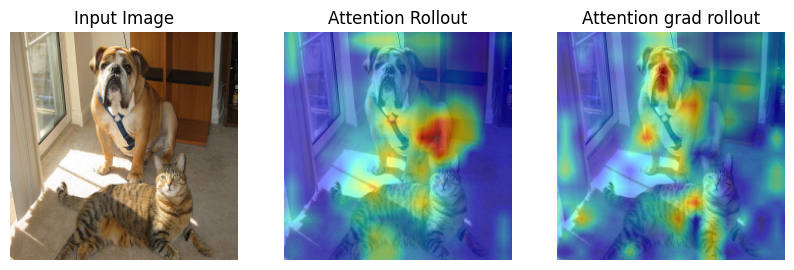

In [5]:
img_src = "./examples/both.png" ### CHOIX DE L'IMAGE
img = Image.open(img_src)
img = img.resize((224, 224))
input_tensor = TRANSFORM(img).unsqueeze(0)
np_img = np.array(img)

# Attention rollout
att_rollout, _ = attention_rollout(input_tensor, MODEL, head_fusion="max", discard_ratio=0.8)
attention_rollout_mask = create_mask(att_rollout)
img_attention_rollout = show_mask_on_image(np_img, attention_rollout_mask)

# Attention grad rollout
category = 243 ## CHOIX DE LA CATEGORIE
att_grad_rollout, _ = attention_grad_rollout(input_tensor, MODEL, category, head_fusion="max", discard_ratio=0.995)
attention_grad_rollout_mask = create_mask(att_grad_rollout)
img_grad_attention_rollout = show_mask_on_image(np_img, attention_grad_rollout_mask)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(np_img)
ax[0].set_title("Input Image")
ax[0].axis("off")

ax[1].imshow(img_attention_rollout)
ax[1].set_title("Attention Rollout")
ax[1].axis("off")

ax[2].imshow(img_grad_attention_rollout)
ax[2].set_title("Attention grad rollout")
ax[2].axis("off")

plt.show()

### Input gradients

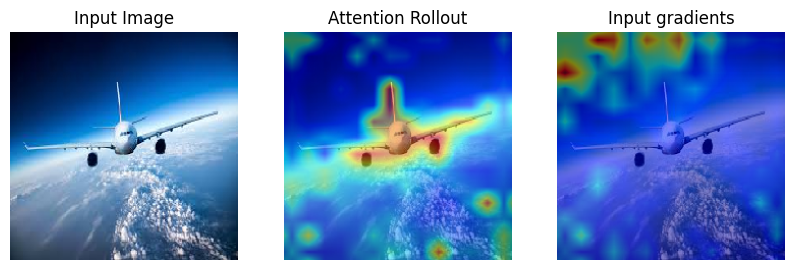

In [6]:
img_src = "./examples/plane2.png" ### CHOIX DE L'IMAGE
img = Image.open(img_src)
img = img.resize((224, 224))
input_tensor = TRANSFORM(img).unsqueeze(0)

# Calcul de l'attention rollout
att_rollout, name = attention_rollout(input_tensor, MODEL, head_fusion="min", discard_ratio=0.8)
attention_rollout_mask = create_mask(att_rollout)

# Affichage de l'image avec le masque
np_img = np.array(img)
img_attention_rollout = show_mask_on_image(np_img, attention_rollout_mask)

# Input grads
_, input_grads = input_gradients(MODEL, input_tensor)
input_grads_mask = create_mask(input_grads)
img_input_grads = show_mask_on_image(np_img, input_grads_mask)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(np_img)
ax[0].set_title("Input Image")
ax[0].axis("off")

ax[1].imshow(img_attention_rollout)
ax[1].set_title("Attention Rollout")
ax[1].axis("off")

ax[2].imshow(img_input_grads)
ax[2].set_title("Input gradients")
ax[2].axis("off")

plt.show()

### Blank-out score

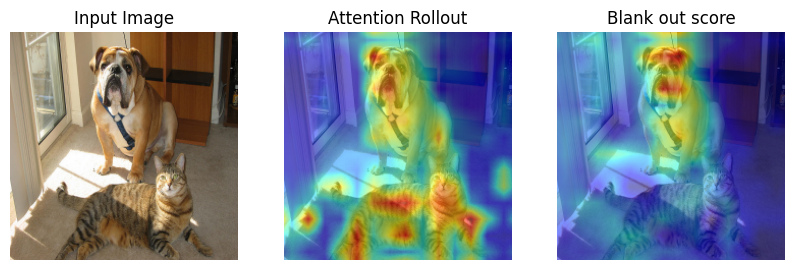

In [7]:
img_src = "./examples/both.png" ### CHOIX DE L'IMAGE
img = Image.open(img_src)
img = img.resize((224, 224))
input_tensor = TRANSFORM(img).unsqueeze(0)

# Calcul de l'attention rollout
att_rollout, _ = attention_rollout(input_tensor, MODEL, head_fusion="min", discard_ratio=0.8)
attention_rollout_mask = create_mask(att_rollout)

# Affichage de l'image avec le masque
np_img = np.array(img)
img_attention_rollout = show_mask_on_image(np_img, attention_rollout_mask)

# Blank out
blank_out_score = blank_out(MODEL, input_tensor, method='avg_color_square')
blank_out_mask = create_mask(blank_out_score)
blank_out_img = show_mask_on_image(np_img, blank_out_mask)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(np_img)
ax[0].set_title("Input Image")
ax[0].axis("off")

ax[1].imshow(img_attention_rollout)
ax[1].set_title("Attention Rollout")
ax[1].axis("off")

ax[2].imshow(blank_out_img)
ax[2].set_title("Blank out score")
ax[2].axis("off")

plt.show()

In [8]:
print(
    'La corrélation de Spearman entre l\' attention rollout et le blank-out score est de {:.3f}'.format(
        spearman_correlation(att_rollout, blank_out_score)
    )
)

La corrélation de Spearman entre l' attention rollout et le blank-out score est de 0.379


### Test statistiques

In [9]:
image_list = get_image_list(10) # Prend environ 1 minute

In [10]:
HEAD_FUSION = "mean"
DISCARD_RATIO = 0.98

N = len(image_list)
A = np.zeros(N)

## Comparaison entre grad rollout et input gradients

for n, image in enumerate(image_list):
    #print(f"Starting image {n}")
    input_tensor = TRANSFORM(image).unsqueeze(0)
    att_rollout, _ = attention_grad_rollout(input_tensor, MODEL, None, head_fusion=HEAD_FUSION, discard_ratio=DISCARD_RATIO)
    _, input_grad = input_gradients(MODEL, input_tensor,)
    corr = spearman_correlation(att_rollout, input_grad)
    #print(f"\tSpearman correlation is {corr:.3f}")
    A[n] = corr

print(f"Mean: {A.mean()}")
print(f"Std: {A.std()}")

Mean: -0.07698762441329521
Std: 0.2674865779838552
